<a href="https://colab.research.google.com/github/germanh1206/Backend/blob/main/para_echoli_proteome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS R


Resultados MLP:
 Neurona(s)  Capas  Precisión
          1      1   0.559105
          1      2   0.559105
          2      1   0.789137
          2      2   0.559105
          3      1   0.800319
          3      2   0.792332
          4      1   0.793930
          4      2   0.798722
          5      1   0.814696
          5      2   0.789137
          6      1   0.793930
          6      2   0.782748
          7      1   0.797125
          7      2   0.806709
          8      1   0.800319
          8      2   0.795527
          9      1   0.801917
          9      2   0.798722
         10      1   0.805112
         10      2   0.800319

Resultados SVM:
Kernel     C  Precisión
linear   0.1   0.559105
linear   1.0   0.773163
linear  10.0   0.789137
linear 100.0   0.805112
  poly   0.1   0.825879
  poly   1.0   0.821086
  poly  10.0   0.817891
  poly 100.0   0.808307
   rbf   0.1   0.801917
   rbf   1.0   0.825879
   rbf  10.0   0.837061
   rbf 100.0   0.803514

Resultados Random Fores

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


<Figure size 640x480 with 0 Axes>

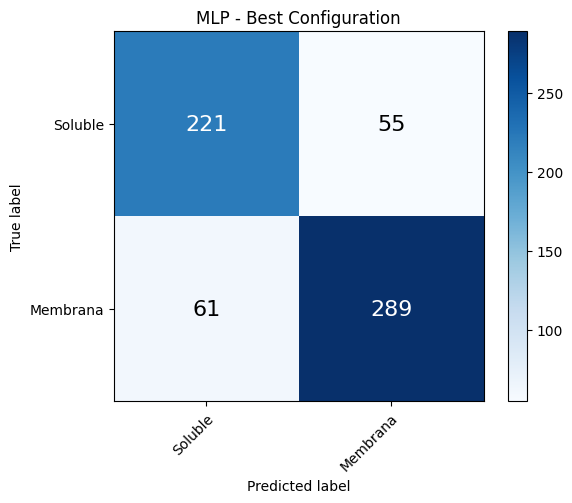

<Figure size 640x480 with 0 Axes>

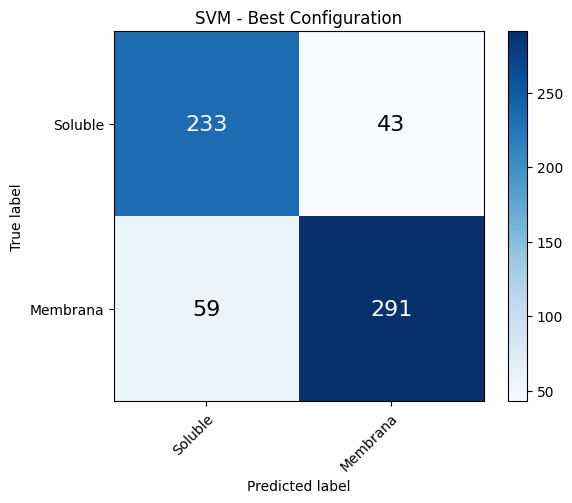

<Figure size 640x480 with 0 Axes>

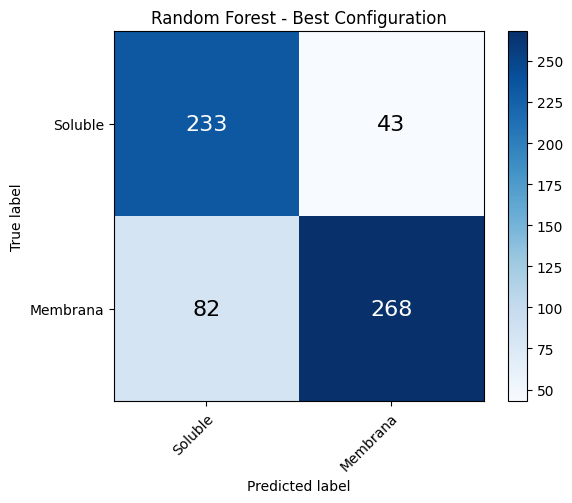

In [2]:
import time
import pandas as pd
import numpy as np
import random
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Timer
start_time = time.time()

# Read in sequence data with classifications
DF = pd.read_csv("./ecoli_proteome.csv")

# Drop any data that does not have a classification
DF = DF.dropna(how="any")

# Dictionary of hydrophobicity scores
aa_hydro = {
    "I": 4.5, "V": 4.2, "L": 3.8, "F": 2.8, "C": 2.5, "M": 1.9, "A": 1.8,
    "G": -0.4, "T": -0.7, "S": -0.8, "W": -0.9, "Y": -1.3, "P": -1.6,
    "H": -3.2, "E": -3.5, "Q": -3.5, "D": -3.5, "N": -3.5, "K": -3.9,
    "R": -4.5, "X": 0, "U": 0
}

# Dictionary of helical propensity scores
aa_secon = {
    "I": 0.97, "V": 0.91, "L": 1.3, "F": 1.07, "C": 1.11, "M": 1.47,
    "A": 1.29, "G": 0.56, "T": 0.82, "S": 0.82, "W": 0.99, "Y": 0.72,
    "P": 0.52, "H": 1.22, "E": 1.44, "Q": 1.27, "D": 1.04, "N": 0.9,
    "K": 1.23, "R": 0.96, "X": 0, "U": 0
}

AAS = tuple(aa_hydro.keys())

def score(sequence):
    hscore = [aa_hydro[res] for res in sequence]
    sscore = [aa_secon[res] for res in sequence]
    return [np.mean(hscore), np.mean(sscore)]

def aa_count(aa, dataframe):
    scores = ["hydro_mean", "ss_mean"]
    aa = list(aa)
    aa.extend(scores)
    blank_df = pd.DataFrame(columns=aa)
    for index, row in dataframe.iterrows():
        counts = [row["Sequence"].count(a) / len(row["Sequence"]) for a in aa[:-len(scores)]]
        counts.extend(score(row["Sequence"]))
        blank_df.loc[index] = counts
    return blank_df

def get_all_features(aas=AAS, df=DF):
    temp_df = aa_count(aas, df)
    final_df = pd.concat([df, temp_df], axis=1)
    final_df.to_csv("./ecoli_proteome_features.csv", index=False)

# Generate features from the sequences
get_all_features()

# Read the features data
df = pd.read_csv("./ecoli_proteome_features.csv")

# Remove unwanted columns
df = df.drop(["U", "X", "A"], axis=1)
df = df.drop(["ss_mean", "hydro_mean"], axis=1)

# Convert to numpy arrays
array = df.values
X = array[:, 3:].astype("float")  # Features
Y = array[:, 2].astype("int")     # Labels (localization)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

# Define function for confusion matrix plotting
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes, title=title,
           ylabel='True label', xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), ha="center", va="center",
                    fontsize=16, color="white" if cm[i, j] > thresh else "black")
    return ax

# ==================== MLPClassifier ====================
mlp_results = []
for neurons in range(1, 11):
    for layers in [1, 2]:
        structure = (neurons,) if layers == 1 else (neurons, neurons)
        model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=structure, random_state=1)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))
        mlp_results.append({
            'Neurons': neurons,
            'Layers': layers,
            'Accuracy': acc
        })

# Create dataframe for MLP results
mlp_df = pd.DataFrame([
    {"Neurona(s)": r["Neurons"], "Capas": r["Layers"], "Precisión": round(r["Accuracy"], 6)}
    for r in mlp_results
])

# ==================== SVM (Support Vector Machine) ====================
svm_results = []
for kernel in ['linear', 'poly', 'rbf']:
    for C in [0.1, 1, 10, 100]:
        model = SVC(kernel=kernel, C=C)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))
        svm_results.append({
            'Kernel': kernel,
            'C': C,
            'Accuracy': acc
        })

# Create dataframe for SVM results
svm_df = pd.DataFrame([
    {"Kernel": r["Kernel"], "C": r["C"], "Precisión": round(r["Accuracy"], 6)}
    for r in svm_results
])

# ==================== Random Forest ====================
rf_results = []
for n in [5, 10, 15]:
    for criterion in ['gini', 'entropy', 'log_loss']:
        model = RandomForestClassifier(n_estimators=n, criterion=criterion, random_state=1)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))
        rf_results.append({
            'n_estimators': n,
            'Criterion': criterion,
            'Accuracy': acc
        })

# Create dataframe for Random Forest results
rf_df = pd.DataFrame([
    {"n_estimators": r["n_estimators"], "Criterio": r["Criterion"], "Precisión": round(r["Accuracy"], 6)}
    for r in rf_results
])

# ==================== Display Results ====================
# Print results in the required format
print("\nResultados MLP:")
print(mlp_df.to_string(index=False))

print("\nResultados SVM:")
print(svm_df.to_string(index=False))

print("\nResultados Random Forest:")
print(rf_df.to_string(index=False))

# ==================== Confusion Matrix Plots ====================
# MLP Confusion Matrix
best_mlp_model = max(mlp_results, key=lambda x: x["Accuracy"])
mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(best_mlp_model["Neurons"],), random_state=1)
mlp_model.fit(X_train, y_train)
mlp_pred = mlp_model.predict(X_test)
cm_mlp = confusion_matrix(y_test, mlp_pred)
Classes = ["Soluble", "Membrana"]

# Plot MLP confusion matrix
plt.figure()
plot_confusion_matrix(cm_mlp, classes=Classes, title="MLP - Best Configuration")

# SVM Confusion Matrix
best_svm_model = max(svm_results, key=lambda x: x["Accuracy"])
svm_model = SVC(kernel=best_svm_model["Kernel"], C=best_svm_model["C"])
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
cm_svm = confusion_matrix(y_test, svm_pred)

# Plot SVM confusion matrix
plt.figure()
plot_confusion_matrix(cm_svm, classes=Classes, title="SVM - Best Configuration")

# Random Forest Confusion Matrix
best_rf_model = max(rf_results, key=lambda x: x["Accuracy"])
rf_model = RandomForestClassifier(n_estimators=best_rf_model["n_estimators"], criterion=best_rf_model["Criterion"], random_state=1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_pred)

# Plot Random Forest confusion matrix
plt.figure()
plot_confusion_matrix(cm_rf, classes=Classes, title="Random Forest - Best Configuration")

plt.show()


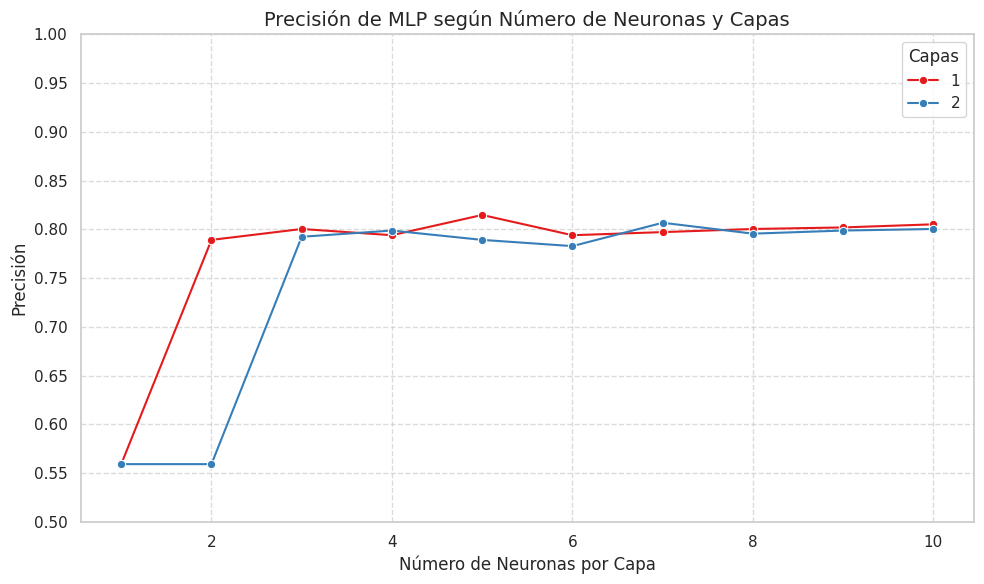

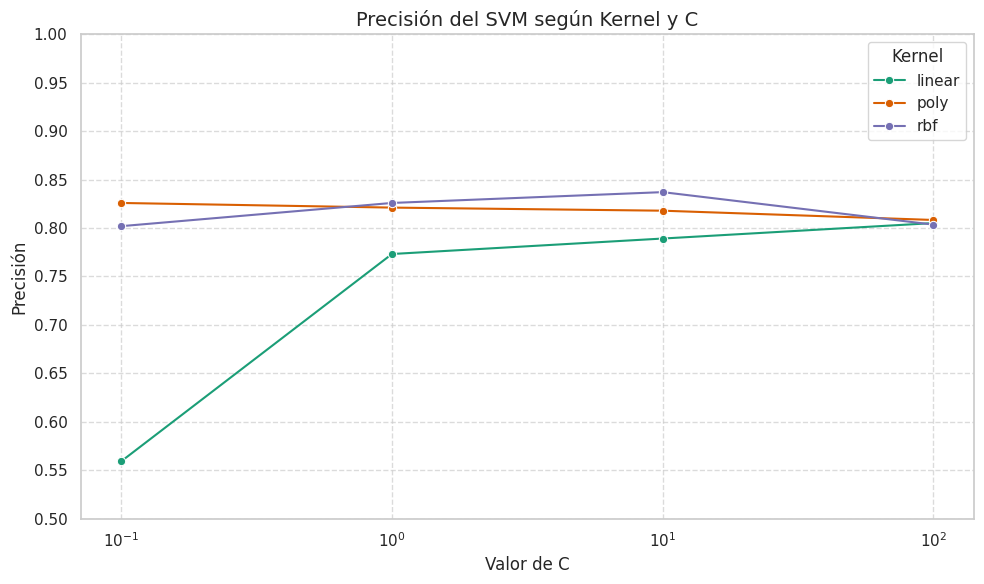

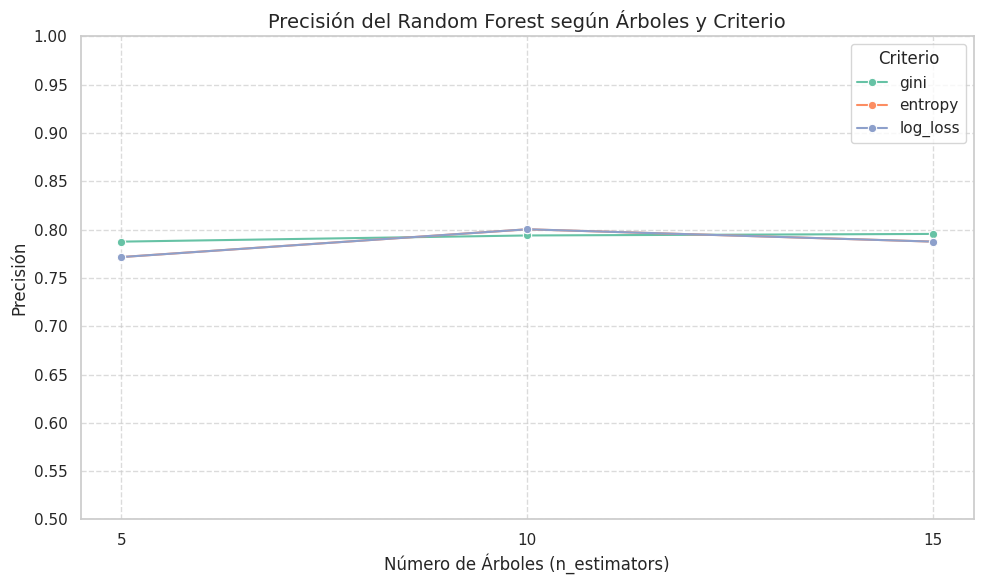

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurar estilos consistentes
sns.set(style="whitegrid")

# Paletas de colores diferenciables
mlp_palette = sns.color_palette("Set1", n_colors=2)        # Para MLP (capas)
svm_palette = sns.color_palette("Dark2", n_colors=3)       # Para SVM (kernels)
rf_palette = sns.color_palette("Set2", n_colors=3)         # Para RF (criterios)

# ==================== Gráfica MLP ====================
plt.figure(figsize=(10, 6))
sns.lineplot(data=mlp_df, x="Neurona(s)", y="Precisión", hue="Capas", marker="o", palette=mlp_palette)
plt.title("Precisión de MLP según Número de Neuronas y Capas", fontsize=14)
plt.xlabel("Número de Neuronas por Capa", fontsize=12)
plt.ylabel("Precisión", fontsize=12)
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.ylim(0.5, 1.0)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Capas")
plt.tight_layout()
plt.show()

# ==================== Gráfica SVM ====================
plt.figure(figsize=(10, 6))
sns.lineplot(data=svm_df, x="C", y="Precisión", hue="Kernel", marker="o", palette=svm_palette)
plt.title("Precisión del SVM según Kernel y C", fontsize=14)
plt.xlabel("Valor de C", fontsize=12)
plt.ylabel("Precisión", fontsize=12)
plt.xscale("log")
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.ylim(0.5, 1.0)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Kernel")
plt.tight_layout()
plt.show()

# ==================== Gráfica Random Forest ====================
# Asegurar que "Criterio" esté limpio
rf_df["Criterio"] = rf_df["Criterio"].str.strip().str.lower()

plt.figure(figsize=(10, 6))
sns.lineplot(data=rf_df, x="n_estimators", y="Precisión", hue="Criterio", marker="o", palette=rf_palette)
plt.title("Precisión del Random Forest según Árboles y Criterio", fontsize=14)
plt.xlabel("Número de Árboles (n_estimators)", fontsize=12)
plt.ylabel("Precisión", fontsize=12)
plt.xticks([5, 10, 15])
plt.yticks(np.arange(0.5, 1.05, 0.05))
plt.ylim(0.5, 1.0)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(title="Criterio")
plt.tight_layout()
plt.show()
